In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
stats.chrisqprob = lambda chrisq, df:stats.chi2.sf(chrisq,df)

##  Creating my own dataset for the Logistic Regression

In [2]:
rawdata = pd.read_csv('ADMIT_1.csv')
rawdata

,Sat,Admit
0,1481,Yes
1,1307,No
2,1336,No
3,1571,Yes
4,1315,No
5,1280,Yes
6,1441,Yes
7,1568,Yes
8,1513,Yes
9,1208,No


In [3]:
data = rawdata.copy()
data['Admit'] = rawdata['Admit'].map({"Yes":1,"No":0})
data

,Sat,Admit
0,1481,1
1,1307,0
2,1336,0
3,1571,1
4,1315,0
5,1280,1
6,1441,1
7,1568,1
8,1513,1
9,1208,0


##  Defining the variables

In [4]:
y = data['Admit']
x1 = data['Sat']

##  Visualizing the data

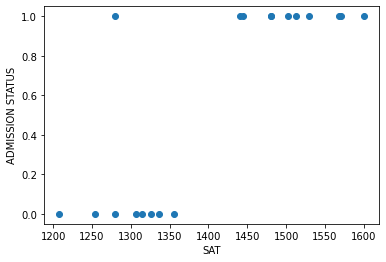

In [5]:
plt.scatter(x1,y)
plt.xlabel('SAT')
plt.ylabel('ADMISSION STATUS')
plt.show()

##  Making the logistic model with statsmodels


In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.239664
         Iterations 8


In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Admit   No. Observations:                   19
Model:                          Logit   Df Residuals:                       17
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Apr 2022   Pseudo R-squ.:                  0.6479
Time:                        04:59:49   Log-Likelihood:                -4.5536
converged:                       True   LL-Null:                       -12.932
Covariance Type:            nonrobust   LLR p-value:                 4.249e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.3088     17.706     -2.277      0.023     -75.011      -5.606
Sat            0.0294      0.013      2.255      0.024       0.004       0.055
==============================================================================
"""

#  Binary predictitons



In [8]:
data1 = pd.read_csv('ADMIT_G.csv')
data1['Admit'] = data1['Admit'].map({'Yes':1,'No':0})
data1['Gender'] = data1['Gender'].map({'female':1,'male':0})
data1

,Sat,Admit,Gender
0,1481,1,1
1,1307,0,0
2,1336,0,0
3,1571,1,1
4,1315,0,0
5,1280,1,1
6,1441,1,1
7,1568,1,1
8,1513,1,1
9,1208,0,0


In [9]:
y = data1['Admit']
x1 = data1['Gender']

x = sm.add_constant(x1)
reg2 = sm.Logit(y,x)
results2 = reg2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.413141
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Admit   No. Observations:                   19
Model:                          Logit   Df Residuals:                       17
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Apr 2022   Pseudo R-squ.:                  0.3722
Time:                        04:59:49   Log-Likelihood:                -7.8497
converged:                       True   LL-Null:                       -12.504
Covariance Type:            nonrobust   LLR p-value:                  0.002281
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0986      0.816     -1.346      0.178      -2.699       0.502
Gender         3.4012      1.329      2.559      0.011       0.796       6.006
==============================================================================
"""

###  Interpretation is that the np.exp of the coef is the number of times one has a higher probability than the other

In [10]:
np.exp(3.4)

29.96410004739701

### It means the probability of the dummy 1 has 29.96 times the chance of entry

##  Using  mulltiple variables

In [11]:
y = data1['Admit']
x1 = data1[['Gender','Sat']]

x = sm.add_constant(x1)
reg2 = sm.Logit(y,x)
results2 = reg2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.181750
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Admit   No. Observations:                   19
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 Apr 2022   Pseudo R-squ.:                  0.7238
Time:                        04:59:49   Log-Likelihood:                -3.4533
converged:                       True   LL-Null:                       -12.504
Covariance Type:            nonrobust   LLR p-value:                 0.0001173
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.8212     18.054     -1.873      0.061     -69.207       1.564
Gender         4.8769      2.712      1.798      0.072      -0.438      10.192
Sat            0.0231      0.013      1.843      0.065      -0.001       0.048
==============================================================================
"""

In [12]:
results2.pred_table()

array([[ 6.,  1.],
       [ 0., 12.]])

##  The accuracy of the model is 

$Accuracy = \frac{ (12 + 6)}{(12 + 6 + 1 + 0)}$

In [13]:
accuracy = (20/21)*100
accuracy

95.23809523809523

#  Testing the model

In [14]:
newdata = pd.read_csv('ADMIT_G1.csv')
newdata['Admit'] = newdata['Admit'].map({'Yes':1,'No':0})
newdata['Gender'] = newdata['Gender'].map({'female':1,'male':0})
newdata

,Sat,Admit,Gender
0,1481,1,1
1,1307,0,0
2,1336,0,0
3,1571,1,1
4,1315,0,0
5,1280,1,1
6,1441,1,1
7,1568,1,1
8,1513,1,1
9,1208,0,0


In [15]:
x

,const,Gender,Sat
0,1.0,1,1481
1,1.0,0,1307
2,1.0,0,1336
3,1.0,1,1571
4,1.0,0,1315
5,1.0,1,1280
6,1.0,1,1441
7,1.0,1,1568
8,1.0,1,1513
9,1.0,0,1208


In [16]:
newdata['const'] =1.0
testdata = newdata[x.columns.values]
testdata

,const,Gender,Sat
0,1.0,1,1481
1,1.0,0,1307
2,1.0,0,1336
3,1.0,1,1571
4,1.0,0,1315
5,1.0,1,1280
6,1.0,1,1441
7,1.0,1,1568
8,1.0,1,1513
9,1.0,0,1208


In [44]:
y = newdata['Admit']
# bins = np.array([0,0.5,1]) used for rounding the values
yh=results2.predict(testdata)
yh1 = yh.round(0)
table =pd.DataFrame(data=testdata['Sat'].values,columns=['Sat'])
table['Gender'] = testdata['Gender'].values
table['Status'] = yh1.values
table['Status'] = table['Status'].map({1:'ADMITTED',0:"NOT ADMITTED"})
table['Gender'] = table['Gender'].map({1:'Female',0:"Male"})
table

,Sat,Gender,Status
0,1481,Female,ADMITTED
1,1307,Male,NOT ADMITTED
2,1336,Male,NOT ADMITTED
3,1571,Female,ADMITTED
4,1315,Male,NOT ADMITTED
5,1280,Female,ADMITTED
6,1441,Female,ADMITTED
7,1568,Female,ADMITTED
8,1513,Female,ADMITTED
9,1208,Male,NOT ADMITTED


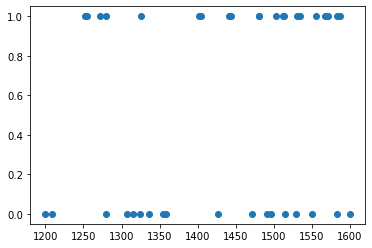

In [46]:
plt.scatter(testdata['Sat'],testdata['Gender'])